## Needed libs

In [18]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
import time

In [19]:
amount_grammars_probability_based = []
timeProbabilityBased = []

amount_grammars_sample_based = []
timeSampleProductions = []

amount_grammars_concat_based = []
timeConcatProductions = []

def manipulate_probability_for_new_non_terminal():
    return {
      "probabilityForNewNonTerminal": 0.5,
      "probabilityForTerminal": 0.5,
      "probabilityForMultipleRightSide": 0.5,
      "probabilityFavourNonTerminalForTerminalOnRightSide": 0.5,
      "probabilityFavourNonTerminalForTerminalInStartProduction": 0.5,
      "decreasingProbabilityFactor": 0.1
    }

In [20]:
def request_probability_grammar (payload):    
    headers = {'Content-type': 'application/json'}
    response = requests.post("https://studienarbeit.mohjohfox.de/api/get/grammar/probability", headers=headers, data=json.dumps(payload))
    if response.status_code == 200:
        # takes response as json
        return response.json() 

def request_sample_productions_grammar ():    
    headers = {'Content-type': 'application/json'}
    response = requests.post("https://studienarbeit.mohjohfox.de/api/get/grammar/probability", headers=headers)
    if response.status_code == 200:
        # takes response as json
        return response.json()       
    
def request_concat_productions_grammar ():    
    headers = {'Content-type': 'application/json'}
    response = requests.post("https://studienarbeit.mohjohfox.de/api/get/grammar/probability", headers=headers)
    if response.status_code == 200:
        # takes response as json
        return response.json()      

In [21]:
start = 0
end = 0
amount_of_grammars = 50
cycle_amount_of_grammars = 0

for i in range(amount_of_grammars):
    start = time.time()
    for k in range(cycle_amount_of_grammars):
        print("1: " + str(k))
        request_probability_grammar(manipulate_probability_for_new_non_terminal())
    end = time.time()
    amount_grammars_probability_based.append(cycle_amount_of_grammars)
    timeProbabilityBased.append(end - start)

    start = time.time()
    for k in range(cycle_amount_of_grammars):
        print("2: " + str(k))
        request_sample_productions_grammar()
    end = time.time()
    amount_grammars_sample_based.append(cycle_amount_of_grammars)
    timeSampleProductions.append(end - start)


    start = time.time()
    for k in range(cycle_amount_of_grammars):
        print("3: " + str(k))
        request_concat_productions_grammar()
    end = time.time()
    amount_grammars_concat_based.append(cycle_amount_of_grammars)
    timeConcatProductions.append(end - start)

    cycle_amount_of_grammars += 1

1: 0
2: 0
3: 0
1: 0
1: 1
2: 0
2: 1
3: 0
3: 1
1: 0
1: 1
1: 2
2: 0
2: 1
2: 2
3: 0
3: 1
3: 2
1: 0
1: 1
1: 2
1: 3
2: 0
2: 1
2: 2
2: 3
3: 0
3: 1
3: 2
3: 3
1: 0
1: 1
1: 2
1: 3
1: 4
2: 0
2: 1
2: 2
2: 3
2: 4
3: 0
3: 1
3: 2
3: 3
3: 4
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
1: 6
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
2: 6
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
3: 6
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
1: 6
1: 7
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
2: 6
2: 7
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
3: 6
3: 7
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
1: 6
1: 7
1: 8
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
2: 6
2: 7
2: 8
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
3: 6
3: 7
3: 8
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
1: 6
1: 7
1: 8
1: 9
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
2: 6
2: 7
2: 8
2: 9
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
3: 6
3: 7
3: 8
3: 9
1: 0
1: 1
1: 2
1: 3
1: 4
1: 5
1: 6
1: 7
1: 8
1: 9
1: 10
2: 0
2: 1
2: 2
2: 3
2: 4
2: 5
2: 6
2: 7
2: 8
2: 9
2: 10
3: 0
3: 1
3: 2
3: 3
3: 4
3: 5
3: 6
3: 7
3: 8
3: 9
3: 10
1: 0
1:

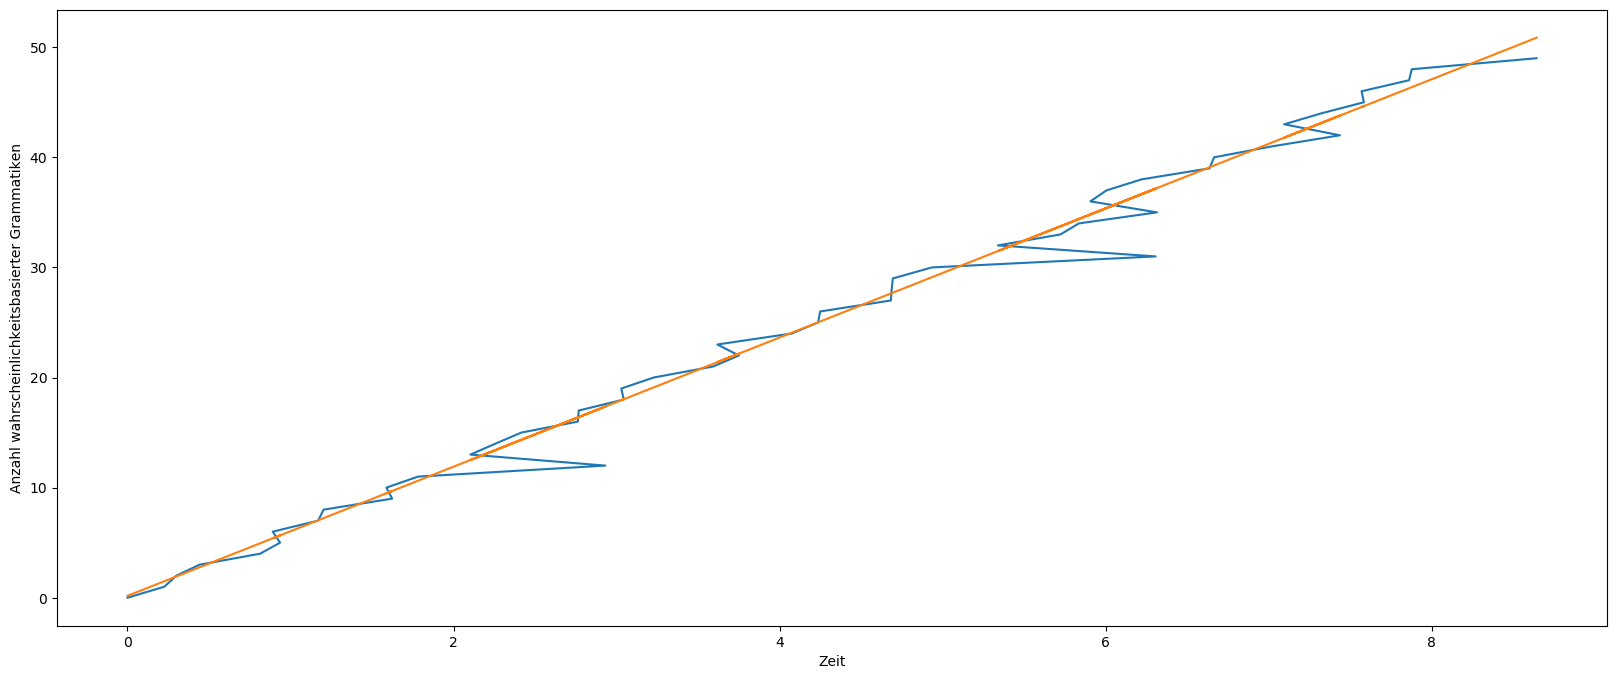

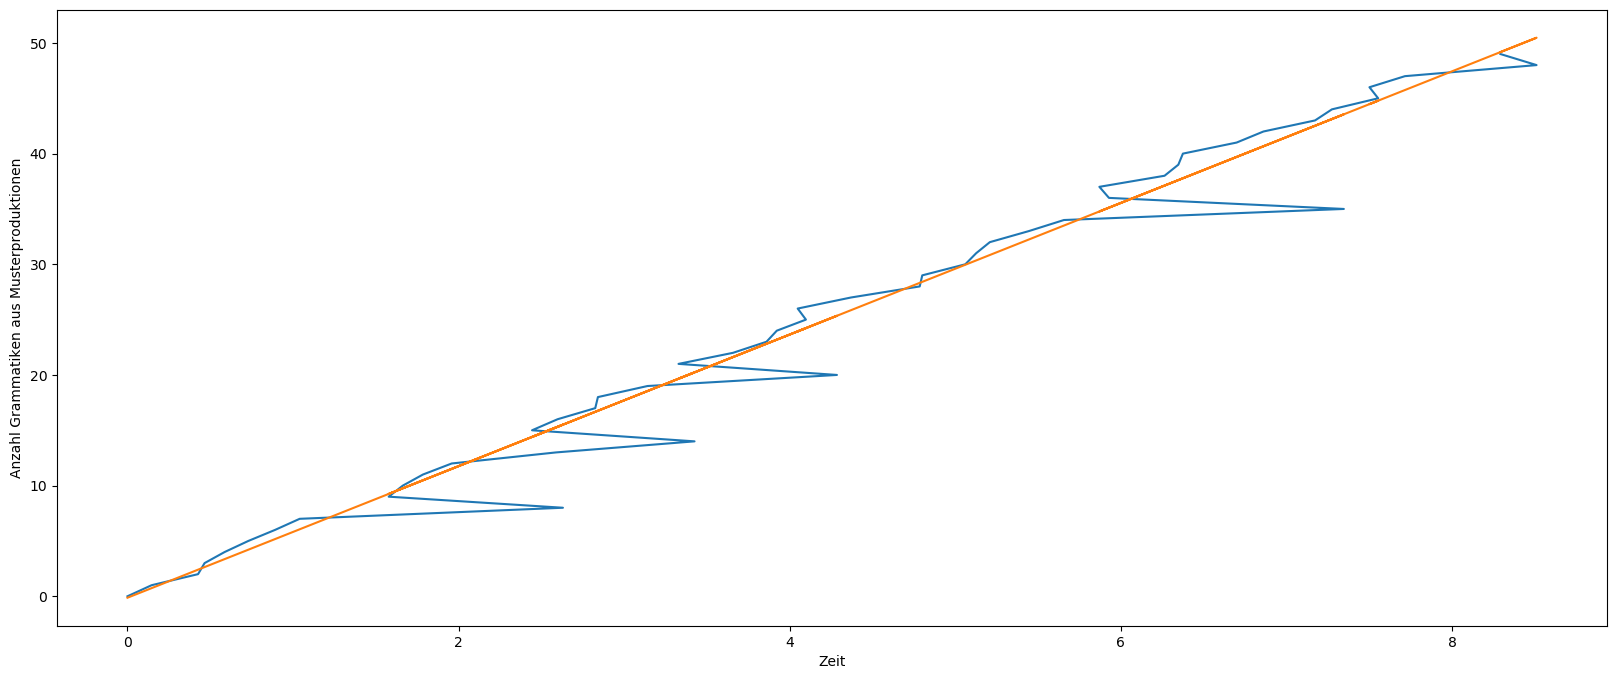

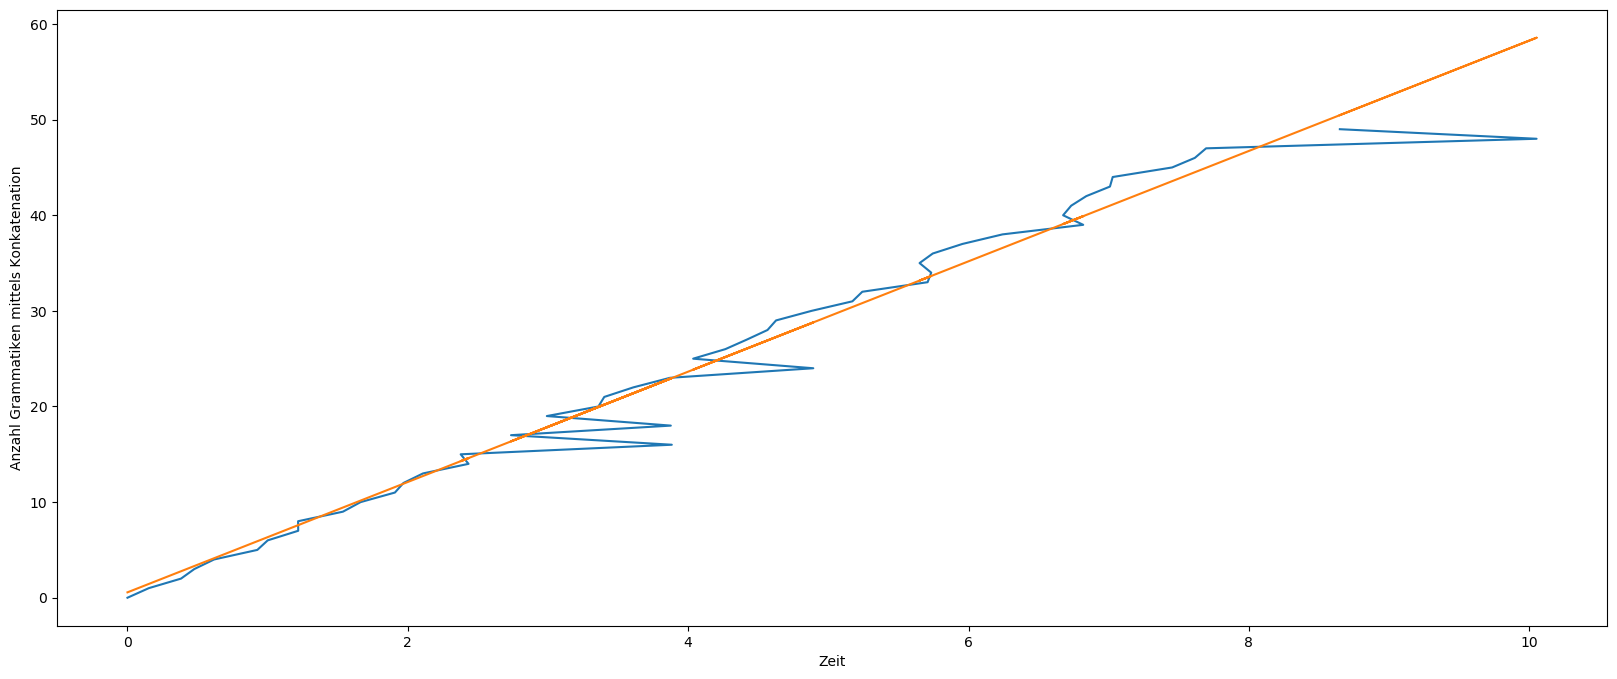

In [22]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeProbabilityBased, amount_grammars_probability_based)
z = np.polyfit(timeProbabilityBased, amount_grammars_probability_based, 1)
p = np.poly1d(z)
plt.plot(timeProbabilityBased, p(timeProbabilityBased))
plt.xlabel('Zeit')
plt.ylabel('Anzahl wahrscheinlichkeitsbasierter Grammatiken')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeSampleProductions, amount_grammars_sample_based)
z = np.polyfit(timeSampleProductions, amount_grammars_sample_based, 1)
p = np.poly1d(z)
plt.plot(timeSampleProductions, p(timeSampleProductions))
plt.xlabel('Zeit')
plt.ylabel('Anzahl Grammatiken aus Musterproduktionen')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeConcatProductions, amount_grammars_concat_based)
z = np.polyfit(timeConcatProductions, amount_grammars_concat_based, 1)
p = np.poly1d(z)
plt.plot(timeConcatProductions, p(timeConcatProductions))
plt.xlabel('Zeit')
plt.ylabel('Anzahl Grammatiken mittels Konkatenation')
plt.show()